In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('E:\datascience\weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
data=data.drop(columns={'Date'})

In [6]:
data=data.replace({'Location':{'Adelaide':0,'Albury':1,'Brisbane':2,'CoffsHarbour':3,'Darwin':4,'Melbourne':5,'Newcastle':6,'Penrith':7,'PerthAirport':8,'Uluru':9,'Williamtown':10,'Wollongong':11}})

In [7]:
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mode()[0])

In [8]:
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mode()[0])

In [9]:
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mode()[0])

In [10]:
data['Evaporation']=data['Evaporation'].fillna(data['Evaporation'].mode()[0])

In [11]:
data['Sunshine']=data['Sunshine'].fillna(data['Sunshine'].mode()[0])

In [12]:
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mode()[0])

In [13]:
data['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])

In [14]:
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mode()[0])

In [15]:
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mode()[0])

In [16]:
data['WindDir9am']=data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])

In [17]:
data['WindDir3pm']=data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])

In [18]:
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mode()[0])

In [19]:
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mode()[0])

In [20]:
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mode()[0])

In [21]:
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mode()[0])

In [22]:
data['Cloud9am']=data['Cloud9am'].fillna(data['Cloud9am'].mode()[0])

In [23]:
data['Cloud3pm']=data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0])

In [24]:
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mode()[0])

In [25]:
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mode()[0])

In [26]:
data['RainToday']=data['RainToday'].fillna(data['RainToday'].mode()[0])

In [27]:
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [28]:
data=data.replace({'RainToday':{'No':0,'Yes':1}},{'RainTomorrow':{'No':0,'Yes':1}})

In [29]:
data=data.replace({'WindGustDir':{'E':0,'ENE':1,'ESE':2,'N':3,'NE':4,'NNE':5,'NNW':6,'NW':7,'S':8,'SE':9,'SSE':10,'SW':11,'SSW':12,'W':13,'WNW':14,'WSW':15}})

In [30]:
data=data.replace({'WindDir9am':{'E':0,'ENE':1,'ESE':2,'N':3,'NE':4,'NNE':5,'NNW':6,'NW':7,'S':8,'SE':9,'SSE':10,'SW':11,'SSW':12,'W':13,'WNW':14,'WSW':15}})

In [31]:
data=data.replace({'WindDir3pm':{'E':0,'ENE':1,'ESE':2,'N':3,'NE':4,'NNE':5,'NNW':6,'NW':7,'S':8,'SE':9,'SSE':10,'SW':11,'SSW':12,'W':13,'WNW':14,'WSW':15}})

In [32]:
data=data.replace({'RainTomorrow':{'Yes':0,'No':1}})

In [33]:
data=data.replace({'RainToday':{'Yes':0,'No':1}})

In [34]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.182682,23.825365,2.725982,4.810220,4.014042,7.196914,40.036320,7.239288,7.795727,...,67.858754,51.295193,1017.198944,1015.635347,5.265875,5.230742,17.742326,22.405982,0.763798,0.763680
std,3.162654,5.380656,6.128159,10.319872,3.912448,4.744297,4.683505,13.781296,4.561930,4.417862,...,16.779787,18.316487,6.359552,6.286580,2.667166,2.564122,5.613463,5.955804,0.424773,0.424846
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000
25%,3.000000,9.300000,19.200000,0.000000,4.000000,0.000000,3.000000,31.000000,3.000000,4.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,1.000000,1.000000
50%,6.000000,13.200000,23.200000,0.000000,4.000000,0.200000,7.000000,39.000000,7.000000,8.000000,...,68.000000,51.000000,1016.100000,1017.000000,7.000000,7.000000,17.700000,21.800000,1.000000,1.000000
75%,8.000000,17.300000,28.000000,0.800000,5.200000,8.900000,11.000000,48.000000,11.000000,11.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,1.000000,1.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [35]:
df_features=data.drop('RainTomorrow',axis=1)

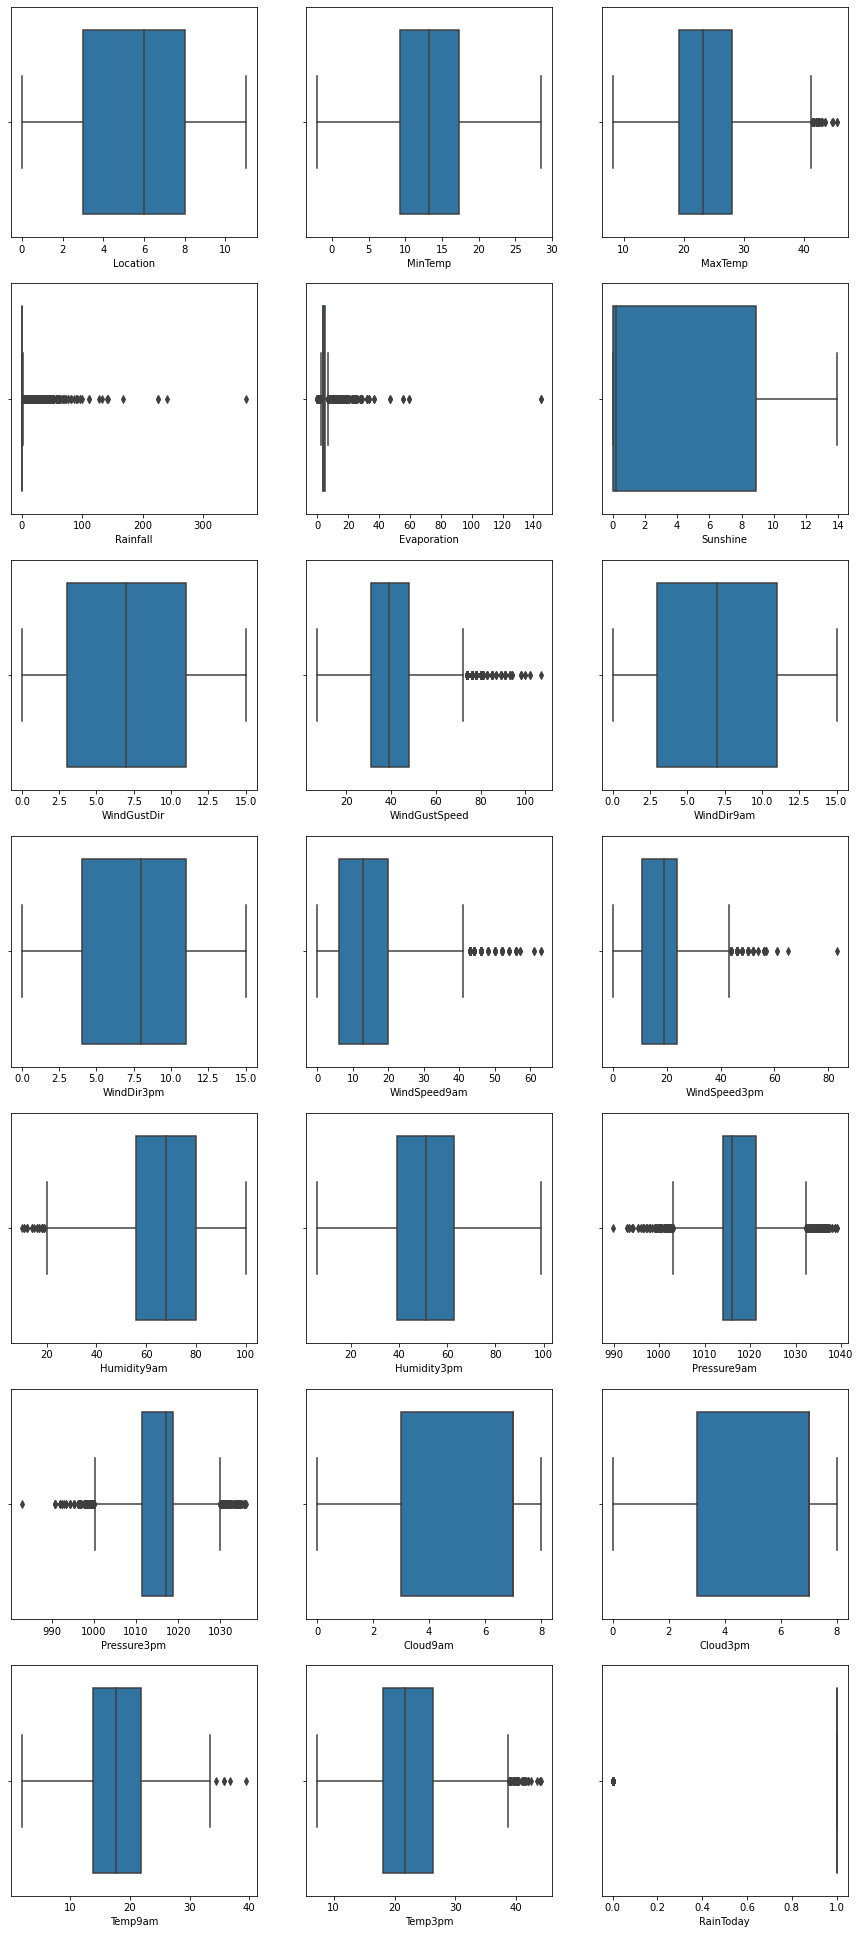

In [36]:
plt.figure(figsize=(15,50))
graph=1

for column in df_features:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=10)
        
    graph+=1
    
plt.show()

In [37]:
q1=data.quantile(0.25)

In [38]:
q3=data.quantile(0.75)

In [39]:
iqr=q3-q1

In [40]:
loc_high=(q3.Location+(1.5*iqr.Location))
loc_high

15.5

In [41]:
index=np.where(data['Location']>loc_high)
index

(array([], dtype=int64),)

In [42]:
min_high=(q3.MinTemp+(1.5*iqr.MinTemp))
min_high

29.3

In [43]:
index=np.where(data['MinTemp']>min_high)
index

(array([], dtype=int64),)

In [44]:
max_high=(q3.MaxTemp+(1.5*iqr.MaxTemp))
max_high

41.2

In [45]:
index=np.where(data['MaxTemp']>max_high)
index

(array([  44,   59,   60,   61,   62,   67,   68,  405,  406,  407,  417,
        2527, 2859, 3271, 3277, 3278, 3284, 3291, 3301, 3302, 3711, 4123,
        4129, 4130, 4136, 4143, 4153, 4154, 4618, 5429, 6994, 7326, 7983,
        7984], dtype=int64),)

In [46]:
data=data.drop(data.index[index])

In [47]:
data.shape

(8391, 22)

In [48]:
rain_high=(q3.Rainfall+(1.5*iqr.Rainfall))
rain_high

2.0

In [49]:
index=np.where(data['Rainfall']>rain_high)
index

(array([  11,   12,   13, ..., 8344, 8347, 8349], dtype=int64),)

In [50]:
data=data.drop(data.index[index])
data.shape

(6756, 22)

In [51]:
eva_high=(q3.Evaporation+(1.5*iqr.Evaporation))
eva_high

7.0

In [52]:
index=np.where(data['Evaporation']>eva_high)
index

(array([ 891,  901,  905, ..., 6707, 6711, 6713], dtype=int64),)

In [53]:
data=data.drop(data.index[index])
data.shape

(5699, 22)

In [54]:
sun_high=(q3.Sunshine+(1.5*iqr.Sunshine))
sun_high
          

22.25

In [55]:
index=np.where(data['Sunshine']>sun_high)
index

(array([], dtype=int64),)

In [56]:
win_high=(q3.WindGustSpeed+(1.5*iqr.WindGustSpeed))
win_high

73.5

In [57]:
index=np.where(data['WindGustSpeed']>win_high)
index

(array([   8,   46,  217,  292,  296,  314,  608, 1107, 1861, 1970, 1975,
        1989, 1996, 2015, 2028, 2338, 2350, 2357, 2366, 2368, 2377, 2380,
        2381, 2389, 2392, 2424, 2434, 2452, 2469, 2524, 2546, 2616, 2646,
        2654, 2670, 2723, 2724, 2741, 2742, 2746, 2759, 2760, 2912, 2924,
        2931, 2940, 2942, 2951, 2954, 2955, 2963, 2966, 2998, 3008, 3026,
        3043, 3098, 3120, 3190, 3220, 3228, 3244, 3297, 3298, 3315, 3316,
        3320, 3333, 3334, 3371, 3372, 3430, 3438, 3483, 3517, 3524, 3525,
        3535, 3559, 3562, 3574, 3621, 3746, 3758, 3791, 3792, 3807, 3809,
        3818, 3820, 3826, 3883, 3892, 3899, 3900, 3958, 3966, 4011, 4045,
        4052, 4053, 4063, 4087, 4090, 4102, 4149, 4274, 4286, 4319, 4320,
        4335, 4337, 4346, 4348, 4354, 4411, 4420, 4832, 4887, 5031, 5219,
        5231, 5387, 5406, 5434], dtype=int64),)

In [58]:
data=data.drop(data.index[index])
data.shape

(5574, 22)

In [59]:
winspeed_high=(q3.WindSpeed9am+(1.5*iqr.WindSpeed9am))
winspeed_high

41.0

In [60]:
index=np.where(data['WindSpeed9am']>winspeed_high)
index

(array([1488, 1526, 1574, 1624, 1704, 1727, 2396, 2406, 2584, 2943, 2953,
        3131, 3319, 3497, 3521, 3554, 3639, 3667, 3692, 3693, 3694, 3696,
        3712, 3729, 3732, 3735, 3736, 3763, 3776, 3823, 4001, 4025, 4058,
        4143, 4171, 4196, 4197, 4198, 4200, 4216, 4233, 4236, 4239, 4240,
        4267, 4280], dtype=int64),)

In [61]:
data=data.drop(data.index[index])
data.shape

(5528, 22)

In [62]:
winspeed3_high=(q3.WindSpeed3pm+(1.5*iqr.WindSpeed3pm))
winspeed3_high

43.5

In [63]:
index=np.where(data['WindSpeed3pm']>winspeed3_high)
index

(array([ 889,  928,  940, 1222, 1260, 1269, 1272, 1275, 1295, 1296, 1483,
        1583, 1597, 1617, 1729, 1788, 2420, 2494, 2583, 2594, 2603, 2703,
        2742, 2964, 3038, 3127, 3138, 3147, 3247, 3286, 3303, 3475, 3575,
        3790, 3962, 4062], dtype=int64),)

In [64]:
data=data.drop(data.index[index])
data.shape

(5492, 22)

In [65]:
hum_low=(q1.Humidity9am-(1.5*iqr.Humidity9am))
hum_low

20.0

In [66]:
index=np.where(data['Humidity9am']<hum_low)
index

(array([4696, 4697, 4706, 4712, 4725, 5032], dtype=int64),)

In [67]:
data=data.drop(data.index[index])
data.shape

(5486, 22)

In [68]:
hum_high=(q3.Humidity9am+(1.5*iqr.Humidity9am))
hum_high

116.0

In [69]:
index=np.where(data['Humidity9am']>hum_high)
index

(array([], dtype=int64),)

In [70]:
pres_high=(q3.Pressure9am+(1.5*iqr.Pressure9am))
pres_high

1032.25

In [71]:
index=np.where(data['Pressure9am']>pres_high)
index

(array([ 153,  376,  377,  458,  459,  463,  464,  465,  475,  489,  490,
         493,  494,  697, 2320, 2321, 2322, 2339, 2682, 2857, 2858, 2859,
        2876, 3219, 3323, 3324, 3325, 3396, 3400, 3401, 3402, 3422, 3423,
        3424, 3426, 3427, 3618, 3619, 3620, 3631, 3653, 3654, 3655, 3807,
        3808, 3809, 3880, 3884, 3885, 3886, 3906, 3907, 3908, 3910, 3911,
        4102, 4103, 4104, 4115, 4137, 4138, 4139, 4598, 4599, 4600, 4621,
        4624, 4633, 4634, 4635, 4636, 4637, 4641, 4642, 4643, 4644, 4797,
        4799, 4800, 4801, 4836, 4837, 4838, 4839, 4840, 4938, 4939, 4940,
        4956, 4957, 5125, 5126, 5149, 5150, 5165], dtype=int64),)

In [72]:
data=data.drop(data.index[index])
data.shape

(5391, 22)

In [73]:
press_low=(q1.Pressure9am-(1.5*iqr.Pressure9am))
press_low

1003.0500000000001

In [74]:
index=np.where(data['Pressure9am']<press_low)
index

(array([ 252,  618,  662,  866,  948, 2364, 2427, 2431, 2447, 2553, 2685,
        2896, 2959, 2963, 2979, 3085, 3217, 3401, 3408, 3531, 3691, 3866,
        3873, 3996, 4156, 4367, 4804], dtype=int64),)

In [78]:
data=data.drop(data.index[index])
data.shape

(5373, 22)

In [79]:
pres3_high=(q3.Pressure3pm+(1.5*iqr.Pressure3pm))
pres3_high

1029.8999999999999

In [80]:
index=np.where(data['Pressure3pm']>pres3_high)
index

(array([], dtype=int64),)

In [81]:
pres3_low=(q1.Pressure3pm-(1.5*iqr.Pressure3pm))
pres3_low

1000.3

In [82]:
index=np.where(data['Pressure3pm']<pres3_low)
index

(array([ 251,  252,  877, 2246, 2360, 2381, 2427, 2443, 2777, 2891, 2912,
        2958, 2974, 3400, 3467, 3680, 3860, 3927, 4140, 4174, 4350, 4351,
        4537, 4788], dtype=int64),)

In [83]:
data=data.drop(data.index[index])
data.shape

(5349, 22)

In [84]:
tem_high=(q3.Temp9am+(1.5*iqr.Temp9am))
tem_high

34.05

In [85]:
index=np.where(data['Temp9am']>tem_high)
index

(array([54], dtype=int64),)

In [87]:
data=data.drop(data.index[index])
data.shape

(5348, 22)

In [88]:
tem_low=(q1.Temp9am-(1.5*iqr.Temp9am))
tem_low

1.650000000000004

In [89]:
index=np.where(data['Temp9am']<tem_low)
index

(array([], dtype=int64),)

In [90]:
tem3_high=(q3.Temp3pm+(1.5*iqr.Temp3pm))
tem3_high

38.6

In [91]:
index=np.where(data['Temp3pm']>tem3_high)
index

(array([  49,   53,  284,  621, 1932, 1938, 2184, 2212, 2405, 2406, 2710,
        2738, 2931, 2932], dtype=int64),)

In [92]:
data=data.drop(data.index[index])
data.shape

(5334, 22)

In [93]:
tem3_low=(q1.Temp3pm-(1.5*iqr.Temp3pm))
tem3_low

5.8000000000000025

In [94]:
index=np.where(data['Temp3pm']<tem3_low)
index

(array([], dtype=int64),)

In [95]:
rain_high=(q3.RainToday+(1.5*iqr.RainToday))
rain_high

1.0

In [96]:
index=np.where(data['RainToday']>rain_high)
index

(array([], dtype=int64),)

In [97]:
data.shape

(5334, 22)

In [98]:
x=data.drop(columns=['RainTomorrow'])
y=data['RainTomorrow']

In [99]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,1
1,1,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,1
2,1,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,1
3,1,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,1
4,1,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,4.0,0.0,0,31.0,9,1,...,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,1
8421,9,3.6,25.3,0.0,4.0,0.0,6,22.0,9,3,...,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,1
8422,9,5.4,26.9,0.0,4.0,0.0,3,37.0,9,14,...,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,1
8423,9,7.8,27.0,0.0,4.0,0.0,9,28.0,10,3,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,1


In [100]:
y

0       1
1       1
2       1
3       1
4       1
       ..
8420    1
8421    1
8422    1
8423    1
8424    1
Name: RainTomorrow, Length: 5334, dtype: int64

In [101]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [104]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

In [105]:
vif

,vif,Features
0,1.228356,Location
1,7.684290,MinTemp
2,20.500980,MaxTemp
3,4.648081,Rainfall
4,1.274366,Evaporation
5,2.023979,Sunshine
6,1.591662,WindGustDir
7,2.194449,WindGustSpeed
8,1.260121,WindDir9am
9,1.481169,WindDir3pm


<AxesSubplot:>

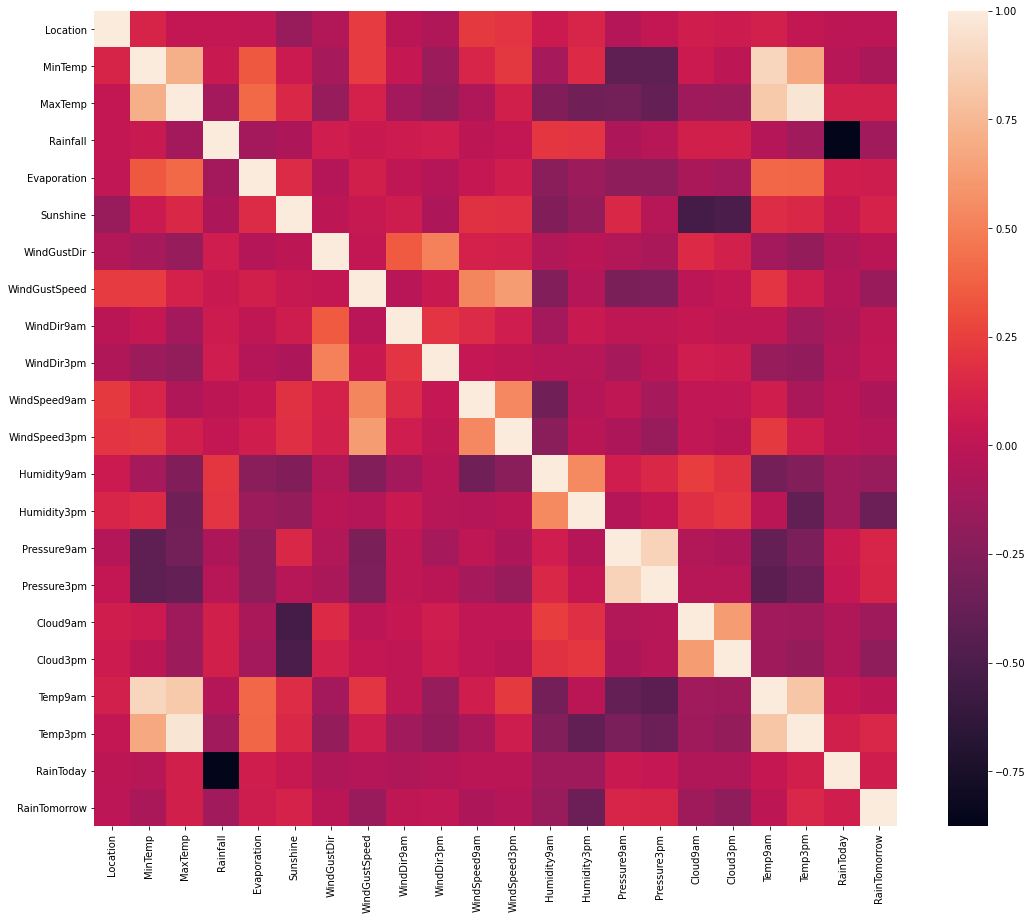

In [108]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr())

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [112]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [113]:
y_pred=log_reg.predict(x_test)

In [114]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [115]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8418290854572713

In [116]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[  73,  171],
       [  40, 1050]], dtype=int64)

In [117]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [119]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.8418290854572713

In [120]:
Precison=true_positive/(true_positive+false_positive)
Precison

0.29918032786885246

In [121]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.6460176991150443

In [122]:
F1_score=2*(Recall*Precison)/(Recall+Precison)
F1_score

0.40896358543417366

In [123]:
auc=roc_auc_score(y_test,y_pred)
print(auc)

0.6312415400812152


In [124]:
fpr,tpr, thresholds=roc_curve(y_test,y_pred)

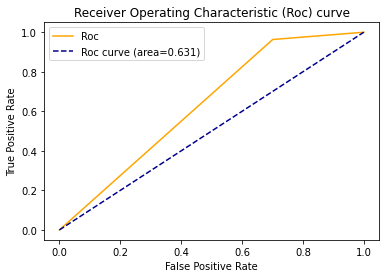

In [125]:
plt.plot(fpr, tpr, color='Orange',label='Roc')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Roc curve (area=%0.3f)'%auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Roc) curve')

plt.legend()

plt.show()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:\datascience\weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
df=df.drop(columns={'Date'})

In [13]:
df=df.replace({'Location':{'Adelaide':0,'Albury':1,'Brisbane':2,'CoffsHarbour':3,'Darwin':4,'Melbourne':5,'Newcastle':6,'Penrith':7,'PerthAirport':8,'Uluru':9,'Williamtown':10,'Wollongong':11}})


In [14]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mode()[0])
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mode()[0])
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mode()[0])
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mode()[0])
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mode()[0])
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0])
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mode()[0])
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mode()[0])
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0])
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mode()[0])
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [15]:
df=df.replace({'RainToday':{'No':0,'Yes':1}},{'RainTomorrow':{'No':0,'Yes':1}})
df=df.replace({'WindGustDir':{'E':0,'ENE':1,'ESE':2,'N':3,'NE':4,'NNE':5,'NNW':6,'NW':7,'S':8,'SE':9,'SSE':10,'SW':11,'SSW':12,'W':13,'WNW':14,'WSW':15}})
df=df.replace({'WindDir9am':{'E':0,'ENE':1,'ESE':2,'N':3,'NE':4,'NNE':5,'NNW':6,'NW':7,'S':8,'SE':9,'SSE':10,'SW':11,'SSW':12,'W':13,'WNW':14,'WSW':15}})
df=df.replace({'WindDir3pm':{'E':0,'ENE':1,'ESE':2,'N':3,'NE':4,'NNE':5,'NNW':6,'NW':7,'S':8,'SE':9,'SSE':10,'SW':11,'SSW':12,'W':13,'WNW':14,'WSW':15}})
df=df.replace({'RainTomorrow':{'Yes':0,'No':1}})
df=df.replace({'RainToday':{'Yes':0,'No':1}})


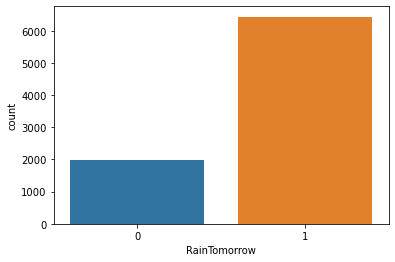

In [16]:
sns.countplot(x='RainTomorrow',data=df)
plt.show()

In [17]:
df.shape

(8425, 22)

In [18]:
from sklearn.feature_selection import SelectKBest,f_classif

In [19]:
x=df.drop('RainTomorrow',axis=1)
y=df.RainTomorrow

In [24]:
best_features=SelectKBest(score_func=f_classif, k=19)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(19,'Score'))

     Feature_Name        Score
13    Humidity3pm  2072.219850
20      RainToday   914.359293
12    Humidity9am   669.732208
17       Cloud3pm   616.533364
3        Rainfall   424.387722
16       Cloud9am   413.393597
5        Sunshine   343.462920
19        Temp3pm   324.008400
7   WindGustSpeed   316.402807
14    Pressure9am   228.180582
2         MaxTemp   195.824535
15    Pressure3pm   152.121389
1         MinTemp    72.940019
10   WindSpeed9am    39.062969
4     Evaporation    30.826986
11   WindSpeed3pm    26.032406
6     WindGustDir    23.012816
8      WindDir9am     8.342792
18        Temp9am     4.692827


In [27]:
new_x=df[['Humidity3pm','RainToday','Humidity9am','Cloud3pm','Rainfall','Cloud9am','Sunshine','Temp3pm','WindGustSpeed','Pressure9am','MaxTemp',
          'Pressure3pm','MinTemp','WindSpeed9am','Evaporation','WindSpeed3pm','WindGustDir',
          'WindDir9am','Temp9am']]

In [28]:
new_x

,Humidity3pm,RainToday,Humidity9am,Cloud3pm,Rainfall,Cloud9am,Sunshine,Temp3pm,WindGustSpeed,Pressure9am,MaxTemp,Pressure3pm,MinTemp,WindSpeed9am,Evaporation,WindSpeed3pm,WindGustDir,WindDir9am,Temp9am
0,22.0,1,71.0,7.0,0.6,8.0,0.0,21.8,44.0,1007.7,22.9,1007.1,13.4,20.0,4.0,24.0,13,13,16.9
1,25.0,1,44.0,7.0,0.0,7.0,0.0,24.3,44.0,1010.6,25.1,1007.8,7.4,4.0,4.0,22.0,14,6,17.2
2,30.0,1,38.0,2.0,0.0,7.0,0.0,23.2,46.0,1007.6,25.7,1008.7,12.9,19.0,4.0,26.0,15,13,21.0
3,16.0,1,45.0,7.0,0.0,7.0,0.0,26.5,24.0,1017.6,28.0,1012.8,9.2,11.0,4.0,9.0,4,9,18.1
4,33.0,1,82.0,8.0,1.0,7.0,0.0,29.7,41.0,1010.8,32.3,1006.0,17.5,7.0,4.0,20.0,13,1,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,24.0,1,51.0,7.0,0.0,7.0,0.0,22.4,31.0,1024.6,23.4,1020.3,2.8,13.0,4.0,11.0,0,9,10.1
8421,21.0,1,56.0,7.0,0.0,7.0,0.0,24.5,22.0,1023.5,25.3,1019.1,3.6,13.0,4.0,9.0,6,9,10.9
8422,24.0,1,53.0,7.0,0.0,7.0,0.0,26.1,37.0,1021.0,26.9,1016.8,5.4,9.0,4.0,9.0,3,9,12.5
8423,24.0,1,51.0,2.0,0.0,3.0,0.0,26.0,28.0,1019.4,27.0,1016.5,7.8,13.0,4.0,7.0,9,10,15.1


In [29]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(new_x)

In [30]:
x_train,x_test,y_test,y_train=train_test_split(x_scaler,y,test_size=0.25,random_state=355)

In [31]:
knn=KNeighborsClassifier()